### ESTIMATION OF OBESITY LEVELS BASED ON EATING HABITS AND PHYSICAL HABITS.

#### INTRODUCTION
This dataset is used to estimate obesity levels based on a number of variables, such as lifestyle patterns, physical activity, and food habits that were gathered from people in Mexico, Peru, and Colombia. Due to its substantial effects on both economic systems and people's health, obesity prevalence has emerged as a global public health concern. Improving intervention efforts can be facilitated by having a better understanding of the underlying elements
 I will be working on machine learning model **(Logistic Regression, Random Forest)** to predict obesity levels.

 **Question**
 - What is the influence of dietary habits and physical activities to Obesity Levels in Peru, Mexico and Colombia?

#### 1. Obtain
here:  - we get the dataset
 - import the necessary libraries
 - we establish the source of data

   Data Source : CC BY 4.0 | UCI Archiveces

In [4]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# read the dataset
obesity_df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

# inspect the header
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# inspect the tail
obesity_df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
# check the shape of the dataset
obesity_df.shape

(2111, 17)

#### 2. Scrub
Here, we check on:
- Completeness/assess gaps in data
- Consistency
- Data Integrity/Uniformity
- Repeating Values 

In [8]:
# get the information from the dataset
# check for missing values and datatype
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

 - We observe that there are no missing values.
 - There is no consistency across the column casing
 - We need to round off the age, weight, height and ch2o float values to the nearest whole value.

In [10]:
# create consistency on the column names casing
obesity_df.columns = map(str.lower, obesity_df.columns)
obesity_df

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
# round off age to 0 decimal and convert it to an integer
obesity_df["age"] = obesity_df["age"].round(0).astype("int")

# round off Height, weight and ch2o columns to  decimal
obesity_df["height"] = obesity_df["height"].round(1)
obesity_df["weight"] = obesity_df["weight"].round(1)
obesity_df["ch2o"]   = obesity_df["ch2o"].round(1)

obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2111 non-null   object 
 1   age                             2111 non-null   int32  
 2   height                          2111 non-null   float64
 3   weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   favc                            2111 non-null   object 
 6   fcvc                            2111 non-null   float64
 7   ncp                             2111 non-null   float64
 8   caec                            2111 non-null   object 
 9   smoke                           2111 non-null   object 
 10  ch2o                            2111 non-null   float64
 11  scc                             2111 non-null   object 
 12  faf                             21

In [12]:
# check for duplicate values
obesity_duplicates_df = obesity_df[obesity_df.duplicated(keep = False)]
len(obesity_duplicates_df)

42

In [13]:
# create a dataframe that stores non duplicated values
clean_obesity_df = obesity_df[~obesity_df.duplicated(keep = False)]
clean_obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2069 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2069 non-null   object 
 1   age                             2069 non-null   int32  
 2   height                          2069 non-null   float64
 3   weight                          2069 non-null   float64
 4   family_history_with_overweight  2069 non-null   object 
 5   favc                            2069 non-null   object 
 6   fcvc                            2069 non-null   float64
 7   ncp                             2069 non-null   float64
 8   caec                            2069 non-null   object 
 9   smoke                           2069 non-null   object 
 10  ch2o                            2069 non-null   float64
 11  scc                             2069 non-null   object 
 12  faf                             2069 no

In [14]:
# read clean dataframe
# inspect header
clean_obesity_df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21,1.6,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.5,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.8,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.8,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.8,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
# inspect tail
clean_obesity_df.tail()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
2106,Female,21,1.7,131.4,yes,yes,3.0,3.0,Sometimes,no,1.7,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.7,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.8,133.7,yes,yes,3.0,3.0,Sometimes,no,2.1,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.7,133.3,yes,yes,3.0,3.0,Sometimes,no,2.9,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.7,133.5,yes,yes,3.0,3.0,Sometimes,no,2.9,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [16]:
# reset index
clean_obesity_df.reset_index(drop = True, inplace = True)
clean_obesity_df.tail()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
2064,Female,21,1.7,131.4,yes,yes,3.0,3.0,Sometimes,no,1.7,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2065,Female,22,1.7,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2066,Female,23,1.8,133.7,yes,yes,3.0,3.0,Sometimes,no,2.1,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2067,Female,24,1.7,133.3,yes,yes,3.0,3.0,Sometimes,no,2.9,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2068,Female,24,1.7,133.5,yes,yes,3.0,3.0,Sometimes,no,2.9,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [17]:
# generate a clean csv of obesity level data
# clean_obesity_df.to_csv('data/clean_obesity_df.csv', index = False, header = True)

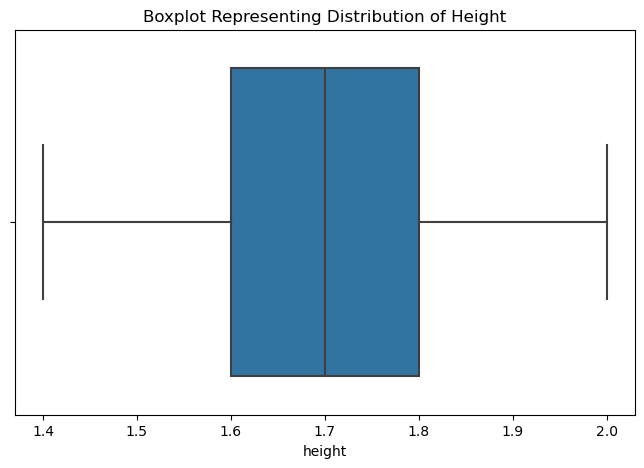

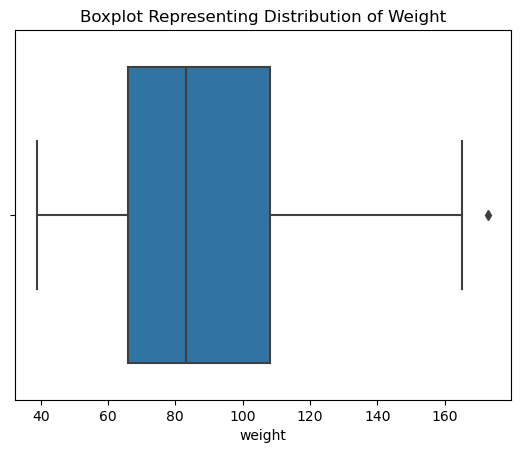

In [18]:
# How is the data dispersed (boxplots - visual inspection of outliers)
plt.figure(figsize=(8,5))
sns.boxplot(data = clean_obesity_df, x = "height")
plt.title("Boxplot Representing Distribution of Height")
plt.show()
sns.boxplot(data = clean_obesity_df, x = "weight")
plt.title("Boxplot Representing Distribution of Weight")
plt.show()

- We observe a symmetrical distribution of the height values and a positive skewed weight with the presence of a few outliers.

In [19]:
# check unique values
clean_obesity_df["weight"].value_counts()

weight
80.0     63
50.0     44
75.0     39
60.0     34
90.0     30
         ..
65.9      1
58.5      1
86.3      1
88.4      1
131.4     1
Name: count, Length: 686, dtype: int64

In [21]:
# handing outliers by capping
def cap_outliers(clean_obesity_df, lower_percentile = 15, upper_percentile=85):
    lower_limit = np.percentile(clean_obesity_df, lower_percentile)
    upper_limit = np.percentile(clean_obesity_df, upper_percentile)
    return np.clip(clean_obesity_df, lower_limit,upper_limit)

clean_obesity_df["weight"] = cap_outliers(clean_obesity_df["weight"])
clean_obesity_df= pd.DataFrame(clean_obesity_df)
clean_obesity_df

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21,1.6,64.00,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.5,56.44,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.8,77.00,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.8,87.00,no,no,3.0,3.0,Sometimes,no,2.0,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.8,89.80,no,no,2.0,1.0,Sometimes,no,2.0,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Female,21,1.7,117.24,yes,yes,3.0,3.0,Sometimes,no,1.7,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2065,Female,22,1.7,117.24,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2066,Female,23,1.8,117.24,yes,yes,3.0,3.0,Sometimes,no,2.1,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2067,Female,24,1.7,117.24,yes,yes,3.0,3.0,Sometimes,no,2.9,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


<function matplotlib.pyplot.show(close=None, block=None)>

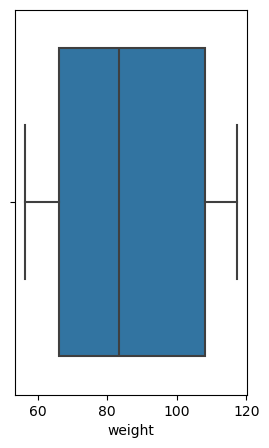

In [22]:
# boxplot after capping
plt.figure(figsize= (3,5))
sns.boxplot(data = clean_obesity_df, x = "weight")
plt.show

- We now observe a normal distribution in weight having dealt with the outliers within a lower bound of 15% and an upper bound of 85%.
- The results to a weight range of between 61kg and 108kg

##### Task 4: Normalization/Standardization
-  Normalize continuous variables such as Age, Weight, Height using MinMax scaling.

In [25]:
# Normalization using min/max scaling
#  create a copy of the original dataframe
clean_obesity_df_min_max_scaler = clean_obesity_df.copy()
# create a list of variables you want to scale
column = ["age","weight", "height","fcvc", "ncp","faf","tue"] #include factors that contribute to obesity.
# scale the variable using max/min scaling ratio 
clean_obesity_df_min_max_scaler[column]= (clean_obesity_df_min_max_scaler[column] -
                                          clean_obesity_df_min_max_scaler[column].min())/(clean_obesity_df_min_max_scaler[column].max() - clean_obesity_df_min_max_scaler[column].min())
clean_obesity_df_min_max_scaler

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,0.148936,0.333333,0.124342,yes,no,0.5,0.666667,Sometimes,no,2.0,no,0.000000,0.500000,no,Public_Transportation,Normal_Weight
1,Female,0.148936,0.166667,0.000000,yes,no,1.0,0.666667,Sometimes,yes,3.0,yes,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.191489,0.666667,0.338158,yes,no,0.5,0.666667,Sometimes,no,2.0,no,0.666667,0.500000,Frequently,Public_Transportation,Normal_Weight
3,Male,0.276596,0.666667,0.502632,no,no,1.0,0.666667,Sometimes,no,2.0,no,0.666667,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,0.170213,0.666667,0.548684,no,no,0.5,0.000000,Sometimes,no,2.0,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Female,0.148936,0.500000,1.000000,yes,yes,1.0,0.666667,Sometimes,no,1.7,no,0.558756,0.453124,Sometimes,Public_Transportation,Obesity_Type_III
2065,Female,0.170213,0.500000,1.000000,yes,yes,1.0,0.666667,Sometimes,no,2.0,no,0.447130,0.299635,Sometimes,Public_Transportation,Obesity_Type_III
2066,Female,0.191489,0.666667,1.000000,yes,yes,1.0,0.666667,Sometimes,no,2.1,no,0.471403,0.323144,Sometimes,Public_Transportation,Obesity_Type_III
2067,Female,0.212766,0.500000,1.000000,yes,yes,1.0,0.666667,Sometimes,no,2.9,no,0.379702,0.293017,Sometimes,Public_Transportation,Obesity_Type_III


- In order to maintain consistency, I used Min-Max Scaling in this stage to standardize the value ranges throughout the dataset. By rescaling the data to a normalized range between 0 and 1, this transformation facilitates the comparison of features with disparate magnitudes or units.
- It ensures uniformity, improves model performance, and facilitates comparison between features.

#### 3. Explore
Your exploration is supported by visualization/ tabulation/ summaries:
What to explore:

- **Tabulation**:
Show totals of broad quantities

- **Summary Statistics**
Describe the characteristics of data (mean, median, std, quartiles)

- **Spread of data**
How is the data dispersed (scatter plots - visual inspection of outliers)

- **Distribution of major variables**
Histogram of singular variables

- **Heatmaps of major variables**
- **Proportions of major variables**


In [28]:
# Summary Statistics
clean_obesity_df_min_max_scaler.describe()

,age,height,weight,fcvc,ncp,ch2o,faf,tue
count,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,0.221085,0.503867,0.493831,0.711358,0.567160,2.004108,0.336191,0.331744
std,0.136022,0.165327,0.358046,0.266726,0.253657,0.608378,0.283574,0.302948
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.127660,0.333333,0.157237,0.500000,0.566294,1.600000,0.040528,0.000000
50%,0.191489,0.500000,0.441776,0.698640,0.666667,2.000000,0.333333,0.315609
75%,0.255319,0.666667,0.851316,1.000000,0.666667,2.500000,0.555463,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


- Central Tendency: Following normalization, each feature's mean values are near 0.5, which represents the range's midway.
- Dispersion: The standard deviation numbers show how variable the normalized data is.
- Uniform Range: The range between 0 and 1 is confirmed by the min and max values.

In [29]:
# Distribution analysis  using histogram and KDE 

def check_distribution(df, column_name):
    """
    Visualize the distribution of a column in the DataFrame.
    
    Parameters:
        clean_obesity_df_min_max_scaler(pd.DataFrame): The DataFrame containing the data.
        column_name (str): The column to analyze.
        
    Returns:
        None
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return
    
    # Check the data type of the column
    column_data = df[column_name]
    if pd.api.types.is_numeric_dtype(column_data):
        # Plot distribution for numerical columns
        plt.figure(figsize=(8, 4))
        sns.histplot(column_data, kde=True, bins=30, color='blue')
        plt.title(f"Distribution of '{column_name}'")
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.grid(True)
        plt.show()
    elif pd.api.types.is_categorical_dtype(column_data) or column_data.dtype == 'object':
        # Plot count plot for categorical columns
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, y=column_name, order=column_data.value_counts().index, palette='viridis')
        plt.title(f"Distribution of '{column_name}' (Categorical)", fontsize=16)
        plt.xlabel("Count", fontsize=12)
        plt.ylabel(column_name, fontsize=12)
        plt.grid(axis='x')
        plt.show()
    else:
        print(f"Column '{column_name}' is not numerical or categorical, and cannot be visualized.")


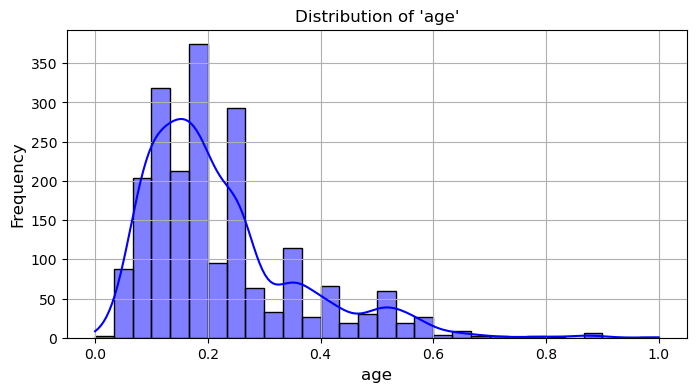

In [30]:
check_distribution(clean_obesity_df_min_max_scaler,"age")

- The plot shows a positively-skewed distribution, with most individuals concentrated at younger normalized age values (around 0.2).
- This indicates that the dataset contains more younger individuals compared to older ones.
The dataset's overall obesity trends may be impacted by the younger population bias indicated by the right skew. If the dataset is dominated by younger people, it could be necessary to assess how age-specific trends affect the projections of obesity.


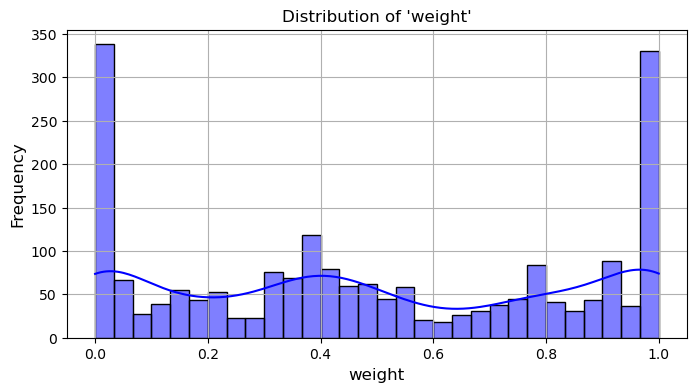

In [31]:
check_distribution(clean_obesity_df_min_max_scaler, "weight")

- We observe a Bimodal Distribution of weight. There are underweights, overweight and normal weight distribution.- 
Weight Categories: Underweight and Normal Weight.- 
Those grouped close to 0.0 might be classified as underweight or normal weight. This may have to do with eating choices, leading a healthy lifestyle, or in certain situations, malnourishment- .
The Obese Group: Those who are more likely to fall into higher obesity levels, such as Type II or Type III obesity, are represented by the peak close to 1.- 0.
This implies that a sizable portion of the data may be impacted by causes of obesity, such as unhealthy eating patterns, inactivity, or metaboproblemsle- ms.
The polarization of weight: The absence of middle-weight individuals suggests a distinct separation between those with lower and higher weights. Different lifestyles, eating habits, or availability to nourishment may be the cause of this polarization.


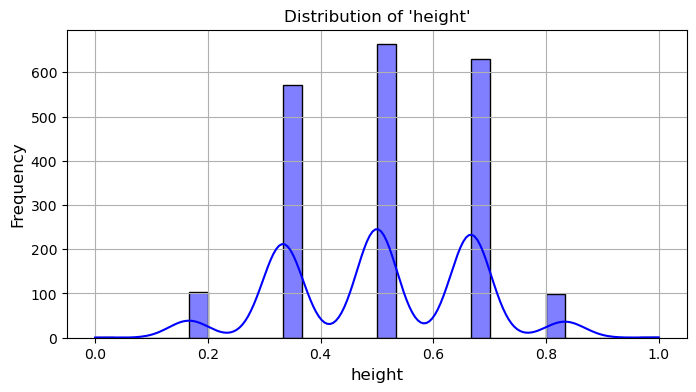

In [33]:
# lets examine the distribution of height on our dataset
check_distribution(clean_obesity_df_min_max_scaler, "height")

- We observe a several humps in our KDE output due to Inherent grouping in the initial height values after normalization.
- The multiple spikes could as well be indicative of unique height groups in our dataset possibly indicating age differences, gender and ethnic factors..

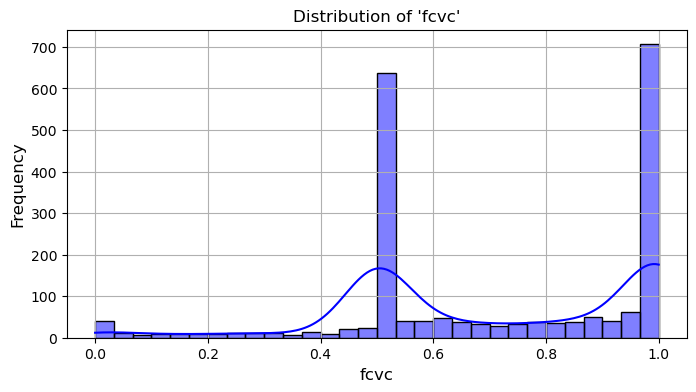

In [35]:
# frequency of vegetable consumption distribution on histogram
check_distribution(clean_obesity_df_min_max_scaler, "fcvc")

- We observe a generally high frequency in vegetable consumption with individuals in the range (0.5 and 1). - 	This is clear that the vast majority of people in the dataset regularly, moderately, or frequently eat vegetables.- •	It indicates a comparatively health-conscious dietary pattern, which is encouraging for the population's dietary practices.


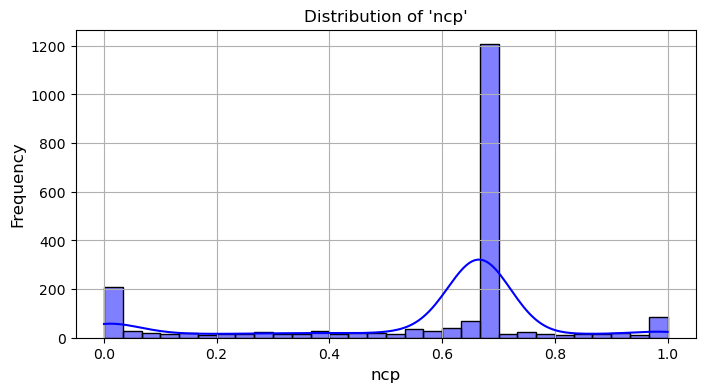

In [37]:
check_distribution(clean_obesity_df_min_max_scaler, "ncp")

- We observe a normal distribution, with the majority of individuals having 3 meals in a day while very few snack in between meals. - 	The majority of people in this demographic eat three meals a day, which implies a healthy starting point for managing weight. But, in order to make sure that their eating habits do not lead to obesity, the smaller group that nibbles in between meals might require being keen on their dietary intake with consideration to calorie intake
-  Health hazards associated with weight can be significantly reduced by encouraging physical activity and adjusting eating habits to nutritional standards.


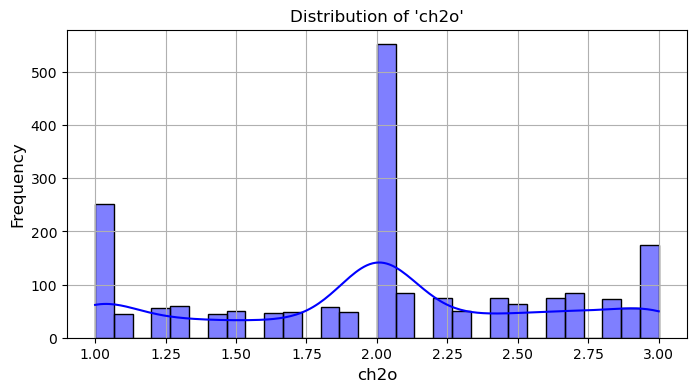

In [39]:
check_distribution(clean_obesity_df_min_max_scaler, "ch2o")

- We observe a normal distribution with water intake with majority of the population water intake ranging between (2ltrs) and a moderate number of people taking (1ltr) in a day.- 
Drinking enough water may reduce calorie intake by encouraging fullness and decreasing the likelihood of consuming high-calorie beverages. Adequate hydration supports metabolic efficiency, including fat oxidation, aiding weight regulation. - 
On the other hand, dehydration may be mistaken for hunger leading to snacking in between meals or overfeeding. Metabolic efficiency is also affected making it harder for the body to process and burn calories.


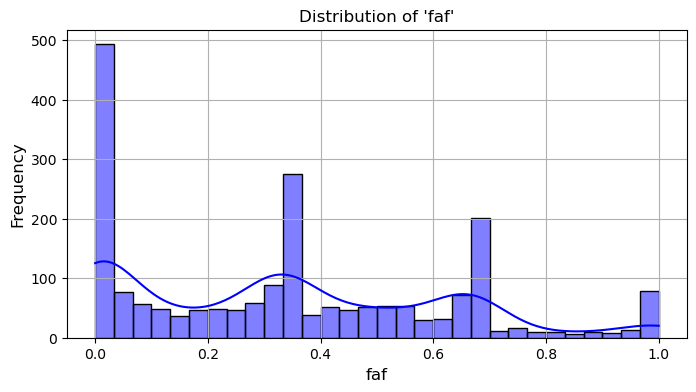

In [41]:
check_distribution(clean_obesity_df_min_max_scaler, "faf")

- We observe a bimodal distribution, with an indication of three classification and groups.
- A majority that does not undertake any physical activities while a moderate number ranging between (0.3 and 0.7). We'd conclude that a cluster of individuals may be taking physical activities to lose some weight while another cluster does it to maintain a good/normal weight.

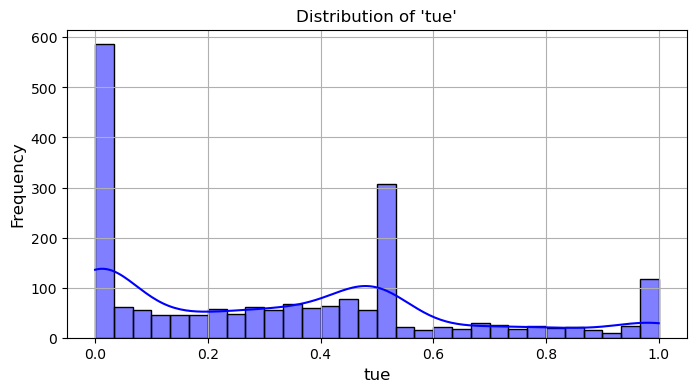

In [43]:
check_distribution(clean_obesity_df_min_max_scaler, "tue")

- We observe a bimodal distribution indicating 2 categories of individuals. Those in range(0.0) that do not use tech devices and those in range (0.5) who moderately use tech devices. - The vast majority of the populations spend little to no time on tech devices suggest Higher levels of physical activity are frequently associated with less or no use of electronic devices; these people may spend more time doing manual labor, being outside, or partaking in more conventional pastimes that do not require screens.
- Sedentary behavior, a major risk factor for obesity, is less common in this population. This group may therefore tend to fall into normal or healthy weight ranges. While those that moderately spend time on tech devices may balance physical activities with screen time.
- However, if tech use involves prolonged periods of sitting or sedentary work (e.g., desk jobs), it could lead to a gradual increase in weight over time.

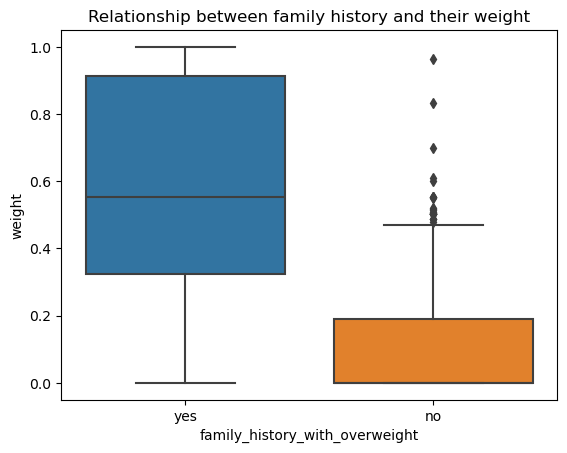

In [45]:
# Relationship Exploration
# Use boxplots to explore relationships between features (like Weight, FAF) and obesity levels
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "family_history_with_overweight", y = "weight")
plt.xlabel("family_history_with_overweight")
plt.ylabel("weight")
plt.title("Relationship between family history and their weight")
plt.show()

- Weight values are typically higher in those with a family history of being overweight.
- These points to a possible hereditary susceptibility or the impact of common family practices (e.g., lifestyle behaviors and eating patterns). People with inherited genetic characteristics that impact metabolism, fat storage, or hunger regulation may be predisposed to being overweight.- 
However, we also observe that people who do not come from family history of overweight, are susceptible to being overweight, indicating that weight is multifactorial.- 
Conclusively, individuals who do not have genetic predisposition to overweight should be cautious of lifestyle behaviors and environmental factors


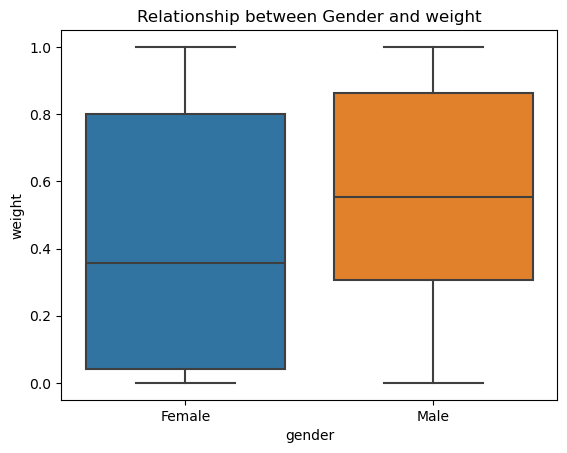

In [47]:
# lets examine gender and weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "gender", y = "weight")
plt.xlabel("gender")
plt.ylabel("weight")
plt.title("Relationship between Gender and weight")
plt.show()

- The median and the average weight of male and female values differ slightly. Males typically have a somewhat larger central weight distribution, even if the data indicates a slight overlap between the two groups.- 
This may indicate that gender disparities in weight distribution are caused by biological or lifestyle factor
s


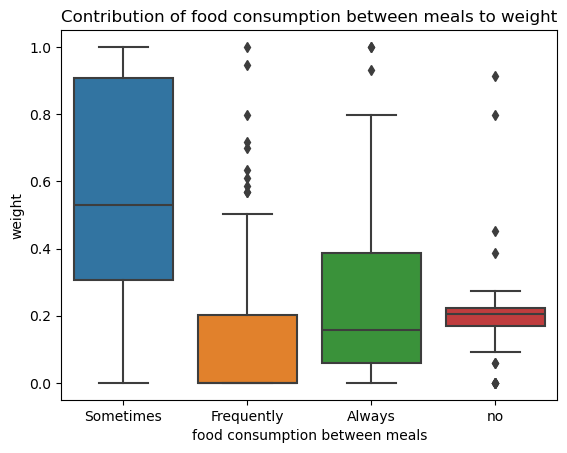

In [49]:
# lets examine food consumption beween mealsand weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "caec", y = "weight")
plt.xlabel("food consumption between meals")
plt.ylabel("weight")
plt.title("Contribution of food consumption between meals to weight")
plt.show()

- **Sometimes** category of individuals prevents sharp insulin swings by giving the body adequate time to digest food and preserve glucose-insulin homeostasis in between meals.- 
People who take food **Frequently** and **always**  helps normalize blood glucose levels by encouraging smaller, more frequent insulin release, hence having lower or moderate weights, potentially due to metabolism differences or portion control.
- 
The most stable weight is displayed by the **No** group, which may be a reflection of their controlled eating habit




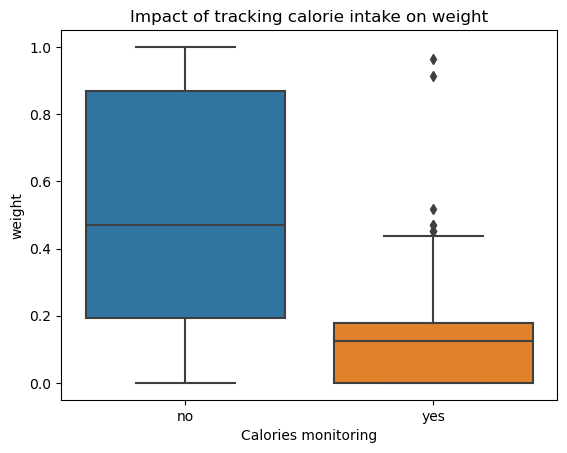

In [51]:
# lets examine the behaviors of individuals who monitors calories and weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "scc", y = "weight")
plt.xlabel("Calories monitoring")
plt.ylabel("weight")
plt.title("Impact of tracking calorie intake on weight")
plt.show()

- We observe that those who monitor calorie levels have normal weight values with spikes indicating the presence of outliers’ i.e. people who are overweight.-  This implies that healthy weight management  may be correlated with calorie awareness.-    Whereas those that are overweight yet monitor calories could be doing so to lose some weight or maintain a balance weight value- Thoseose that do not monitor calorie levels have a normal distribution while the majority of them indicate a high weight value on average.
*    * Conclusively this indicates that those who monitor their calories intake generally make informed choices on dietary factors and whether to engage in physical activit*ies.*


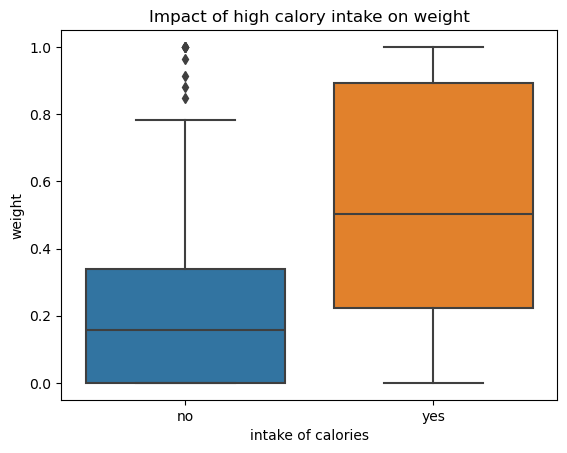

In [53]:
# lets examine calory intake and weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "favc", y = "weight")
plt.xlabel("intake of calories")
plt.ylabel("weight")
plt.title("Impact of high calory intake on weight")
plt.show()

- We observe that individuals who do not take calories have balanced weight values on average, with the presence of few outliers and individuals who are overweight despite low calorie intake. - 
Dieting or long-term calorie restriction can occasionally cause the body to slow its metabolic rate as a defense strategy, which makes weight loss more difficult. This mechanism, known as adaptive thermogenesis, could explain why some low-calorie persons are overweight.
- 
It is also evident that individuals who consume high-calorie diets tend to have a higher proportion of overweight individuals on average.


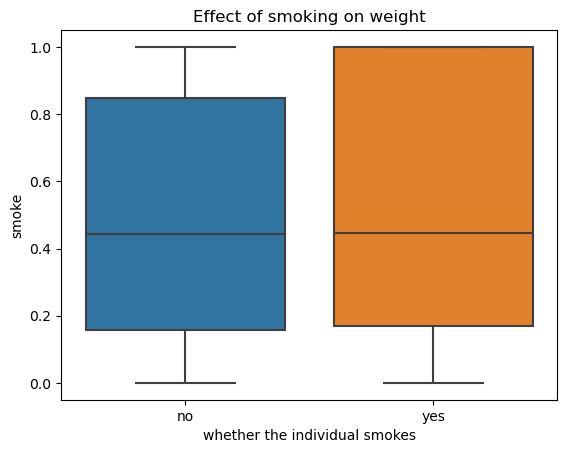

In [55]:
# let's examine smoking and it's effect on weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "smoke", y= "weight")
plt.xlabel("whether the individual smokes")
plt.ylabel("smoke")
plt.title("Effect of smoking on weight")
plt.show()

- We observe that there is no significant relationship between smoking status and median weight. Yet, it is possible that other variables affect weight within each group, giving smokers and non-smokers comparable distributions.

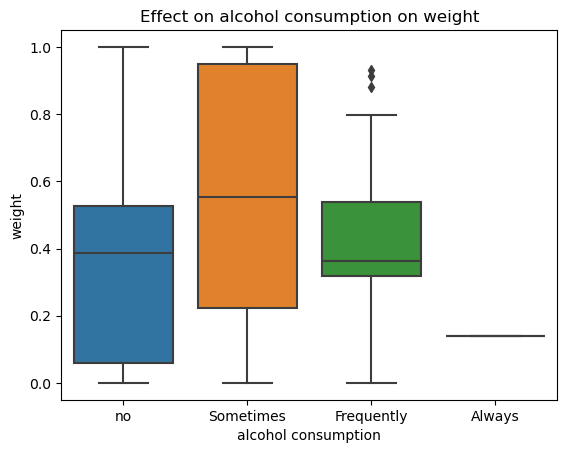

In [57]:
# let's examine alcohol and it's effect on weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "calc", y= "weight")
plt.xlabel("alcohol consumption")
plt.ylabel("weight")
plt.title("Effect on alcohol consumption on weight")
plt.show()

- There is a correlation between those who do not consume alcohol at all and their weight. The more you consume alcohol, the more weight you lose. This suggests Drinkers may inadvertently substitute alcohol for meals, which reduces their total caloric intake. Even though alcohol contains calories, it can sometimes reduce appetite for solid food, which leads to weight loss.
- Those that are frequent alcohol consumers indicate a balanced weight value with the presence of outliers Often linked to lower weight due to appetite suppression, nutrient  absorption, or replacing meals with alcohol.
- Conclusively, the slight variation between categories indicates that people who occasionally, i.e **Sometimes** take alcohol, contributes to weight gain due to intermittent overeating, high-calorie intake from alcohol and mixers, and reduced fat metabolism during drinking
g 

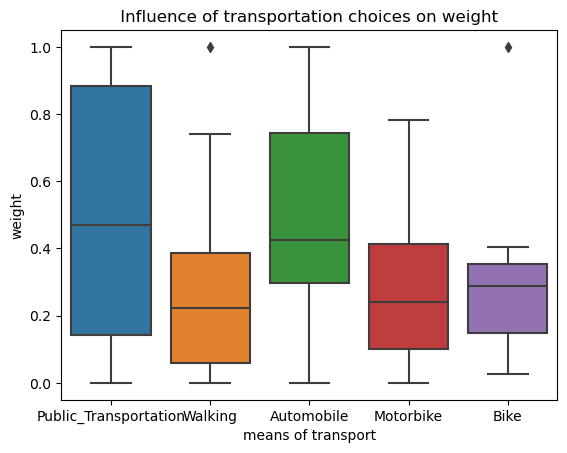

In [59]:
# let's examine means of transport and it's effect on weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "mtrans", y= "weight")
plt.xlabel("means of transport")
plt.ylabel("weight")
plt.title(" Influence of transportation choices on weight ")
plt.show()

- We observe that a majority of people who either walk, use Motorbike or ride Bicycles fall within the category of normal weight values with very few cases of anormalies. Clearly indicating that the population that use motorbike and walk have similar average and median levels.
- Interestingly, individuals who engage in cycling tend to maintain a balanced weight, likely due to the consistent physical activity that helps burn calories effectively.
    *This implies that certain travel methods, which frequently call for physical exercise, can be linked to keeping a healthier weight. The outliers observed would suggest that they may may be working towards maintaining a healthy weight.*
- However, those that use Automobile means of transport indicate a high weight values.
    *This may suggest that using a car is linked to a larger body weight, possibly as a result of the more sedentary lifestyle that cars are generally associated with.*
- People who use Public Means have a normal distribution of weight and a majority of individuals fall in this category.
     *This indicates a suggestion that people who use public transport sometimes engage in physical activities hence creating a balance in the distribution in their w  walking in isolation may not entirely mean, there are stress factors that could induce insulin levelseight*


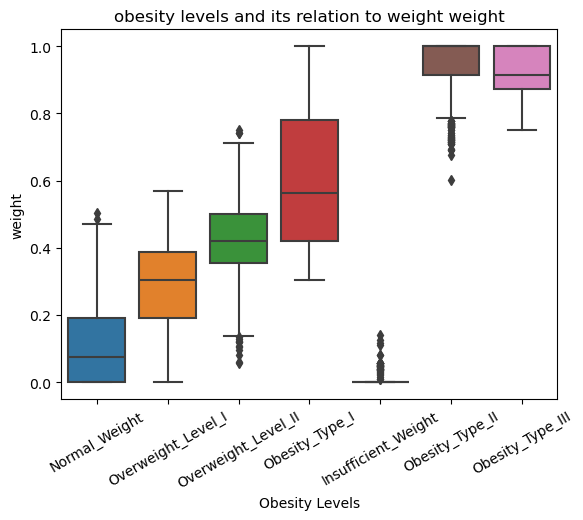

In [61]:
# let's examine obesity levels and its relation to weight weight
sns.boxplot(data = clean_obesity_df_min_max_scaler, x= "nobeyesdad", y= "weight")
plt.xticks(rotation=30)
plt.xlabel("Obesity Levels")
plt.ylabel("weight")
plt.title("obesity levels and its relation to weight weight")
plt.show()

- There is a direct correlation between weight and obesity levels. With the highest obesity level being Obesity Type III.
-The impact of long-term caloric surplus and inadequate energy expenditure is shown by the steady increase in weight with obesity levels.
- Increased rates of obesity are a result of food and lifestyle imbalances throughout time.
- Compared to people with high levels of obesity, who can require drastic dietary and lifestyle changes, people with inadequate or normal weight need other approaches (such as treating malnutrition or avoiding weight gain).
.



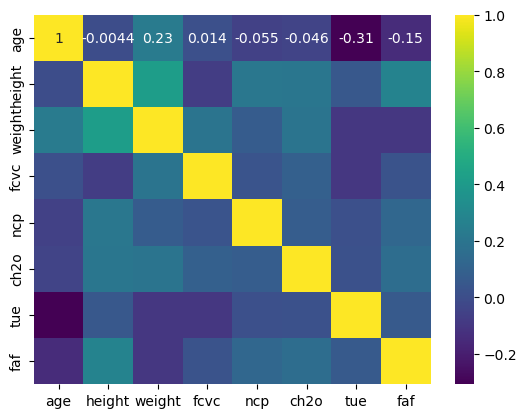

In [63]:
#Create a correlation heatmap to explore relationships between continuous features (like Height, Weight, and Age).
selected_column_df = ["age","height","weight","fcvc", "ncp", "ch2o", "tue","faf"]
corr_matrix = clean_obesity_df_min_max_scaler[selected_column_df].corr()
sns.heatmap(corr_matrix, annot = True, cmap= "viridis")
plt.show()

NB: The dark color gradient indicates weaker correlation while brighter colors apply to stronger correlations.
- Given that taller people typically weigh more, height and weight have a strong positive correlation ranging(0.6-0.7).Frequent physicall activity typically requires more time, thereise a strong positivecorrelationk between faf (frequency of physical activity) and tue (time spent on physical activity)
- However, there is a strong negative correlation between age and tue (use of tech devices)



#### Model
- Advanced Visualizations and Machine Learning (pair plots, feature important plots (for Random Forest), and a heatmap of
the confusion matrix
- )Feature Engineering and Scalngn:( Perform any necessary feature scaling and ensure all features are encoded properly
for machineea lrnin
- i.Train-Test Sl it( Split the data into training (80%) and testing (20%) se
- Machine Learningng Model Implementaon:(( Implement Logistic Regression and Random Forest to predict obesi levels.
- Model Evaluation: Evaluatete the models using metrics like accuracy, precision, recall, and F1-score.
Compare the performance of bothdels.g.)

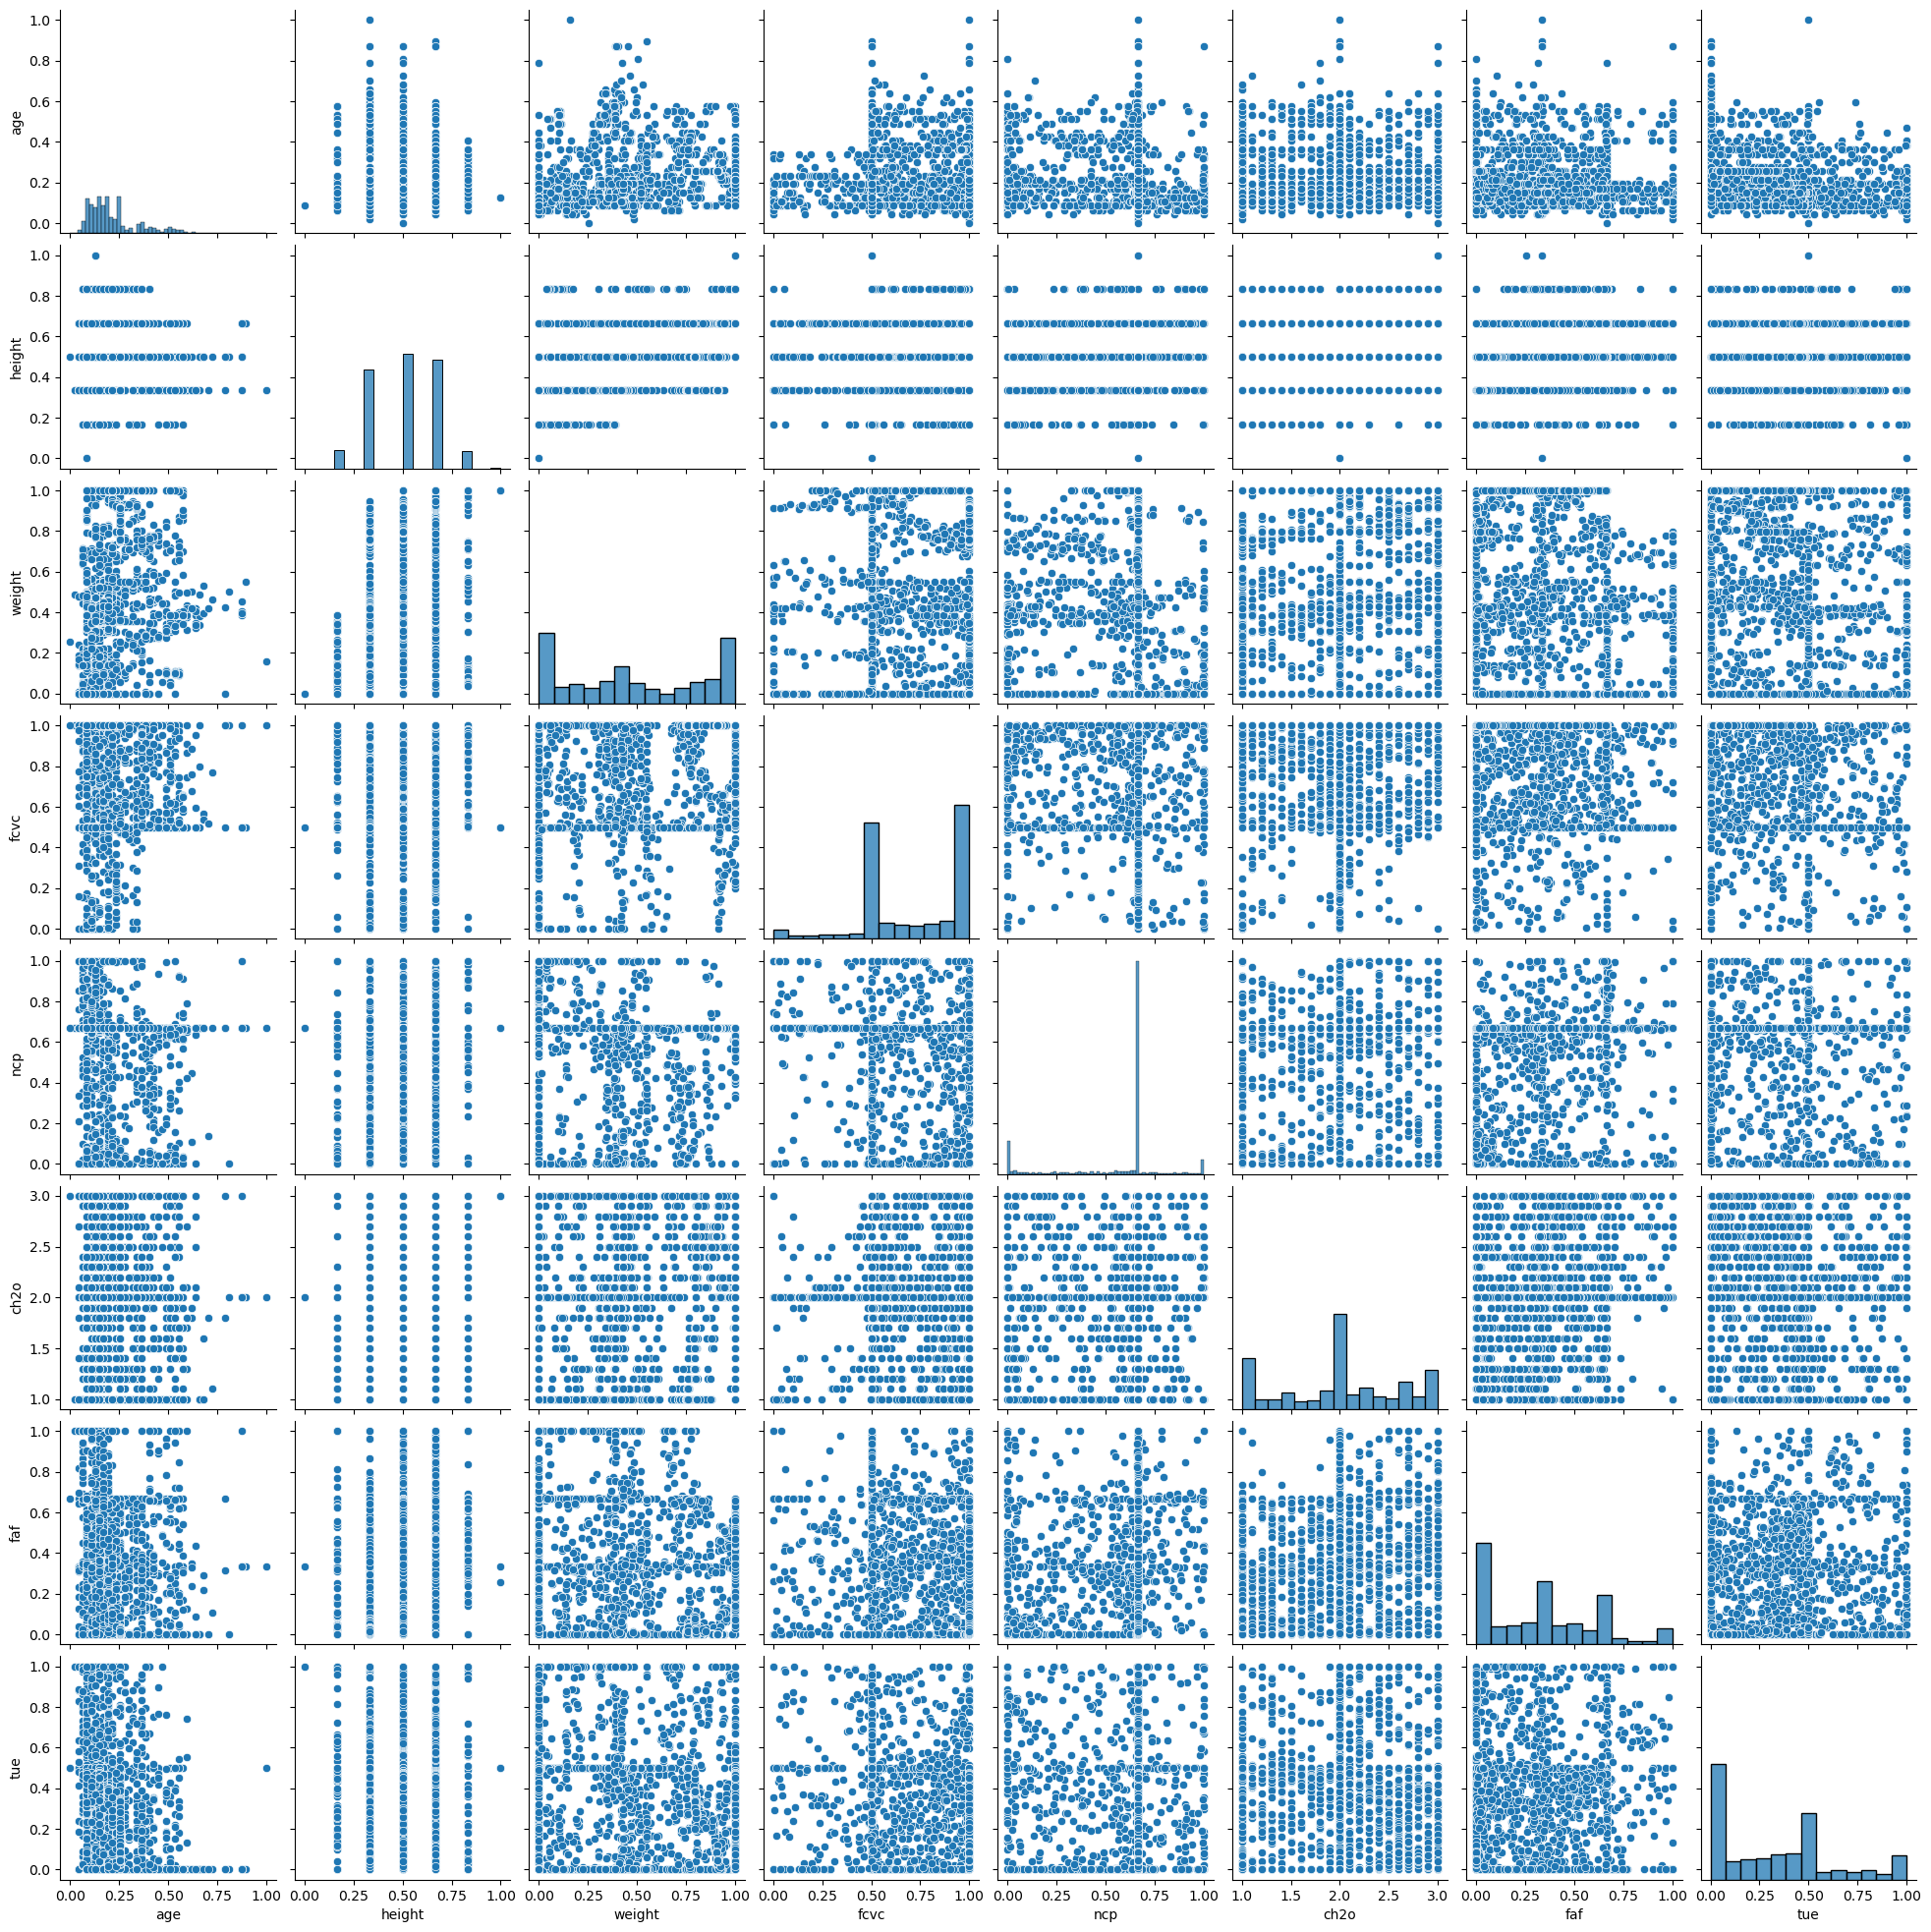

In [66]:
# lets explore the pair plots
sns.pairplot(clean_obesity_df_min_max_scaler, hue=None, kind='scatter', diag_kind='auto', markers=None)
plt.show()

In [69]:
# lets convert the gender and smoke column into binary values before feeding it into machine learning(feature scaling)
clean_obesity_df_min_max_scaler['gender'] = clean_obesity_df_min_max_scaler['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [70]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
clean_obesity_df_min_max_scaler["gender"]=label.fit_transform(clean_obesity_df_min_max_scaler["gender"])
clean_obesity_df_min_max_scaler["family_history_with_overweight"]=label.fit_transform(clean_obesity_df_min_max_scaler["family_history_with_overweight"])
clean_obesity_df_min_max_scaler["favc"]=label.fit_transform(clean_obesity_df_min_max_scaler["favc"])
clean_obesity_df_min_max_scaler["caec"]=label.fit_transform(clean_obesity_df_min_max_scaler["caec"])
clean_obesity_df_min_max_scaler["smoke"]=label.fit_transform(clean_obesity_df_min_max_scaler["smoke"])
clean_obesity_df_min_max_scaler["scc"]=label.fit_transform(clean_obesity_df_min_max_scaler["scc"])
clean_obesity_df_min_max_scaler["calc"]=label.fit_transform(clean_obesity_df_min_max_scaler["calc"])
clean_obesity_df_min_max_scaler["mtrans"]=label.fit_transform(clean_obesity_df_min_max_scaler["mtrans"])
clean_obesity_df_min_max_scaler["nobeyesdad"]=label.fit_transform(clean_obesity_df_min_max_scaler["nobeyesdad"])

In [71]:
clean_obesity_df_min_max_scaler["nobeyesdad"]

0       1
1       1
2       1
3       5
4       6
       ..
2064    4
2065    4
2066    4
2067    4
2068    4
Name: nobeyesdad, Length: 2069, dtype: int32

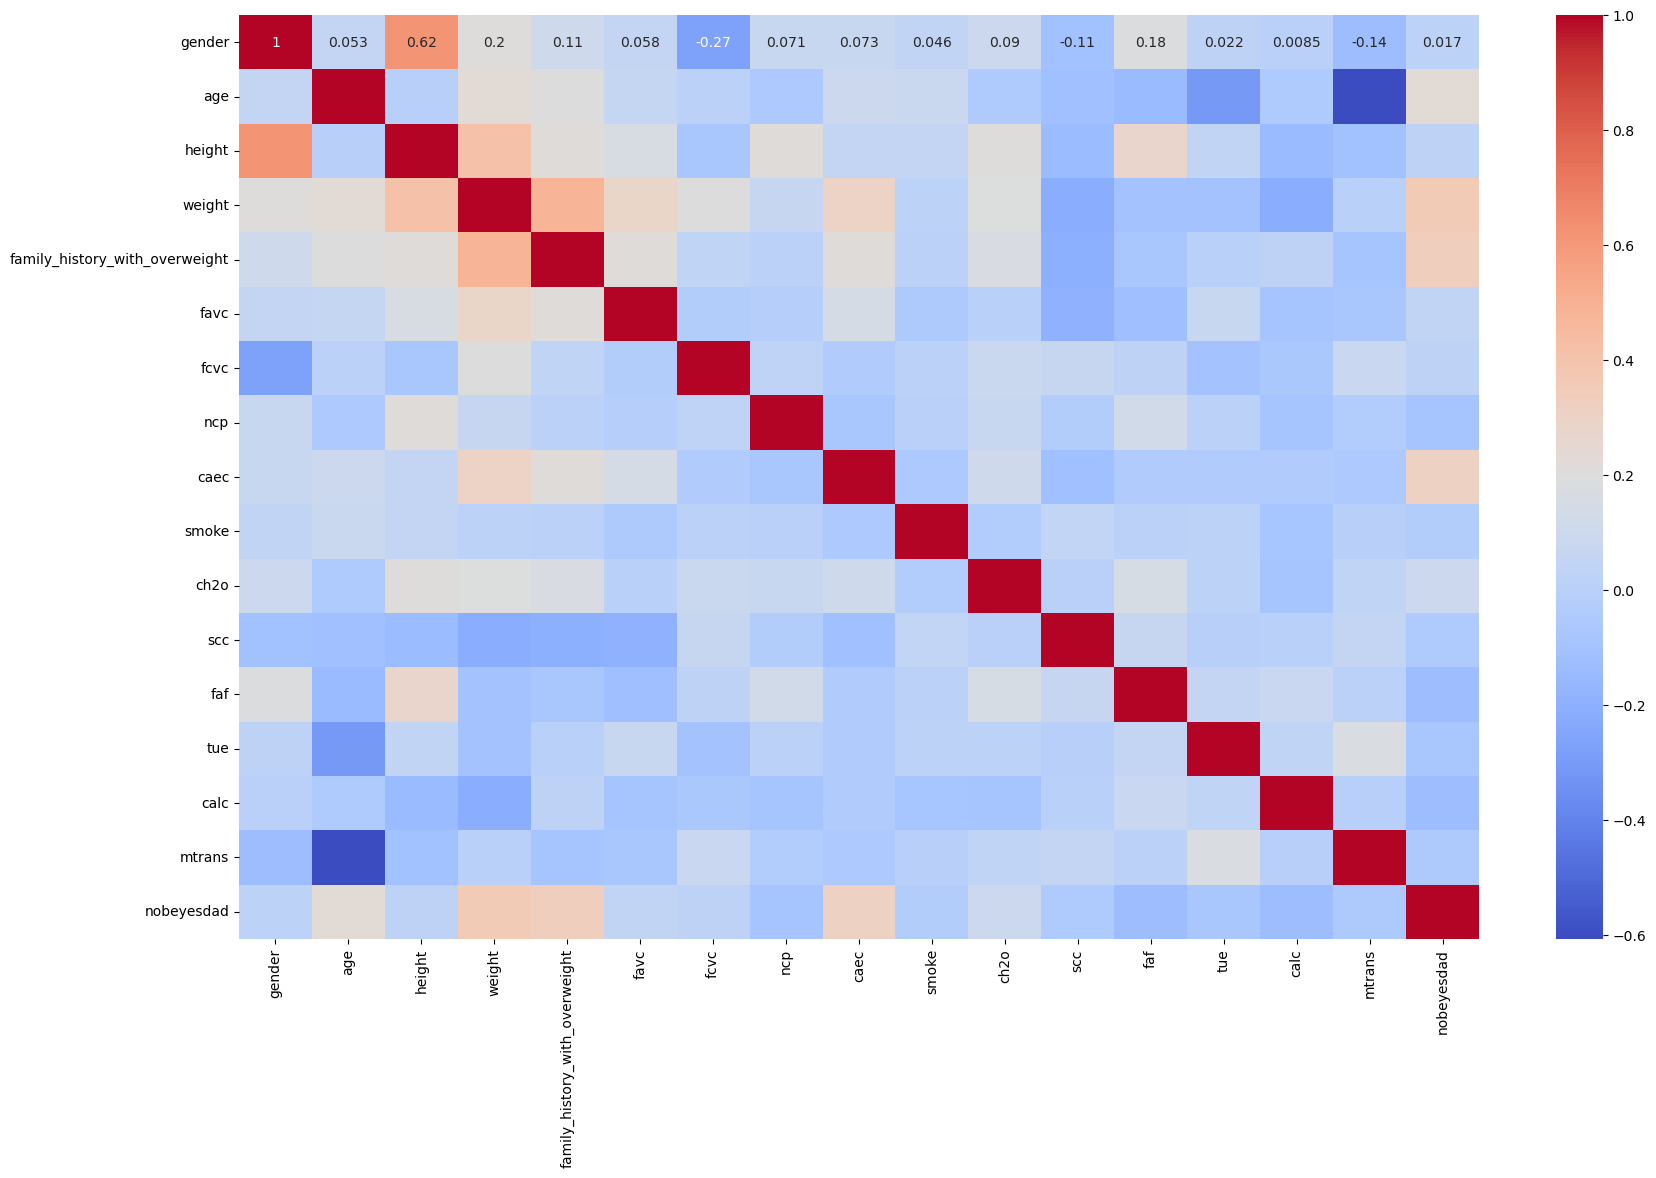

In [72]:
# lets plot heatmap
plt.figure(figsize= (20,12))
sns.heatmap(clean_obesity_df_min_max_scaler.corr(), annot = True, cmap= "coolwarm")
plt.show()

In [73]:
# call x and y values
x= clean_obesity_df_min_max_scaler.drop("nobeyesdad", axis = 1) #independent
y= clean_obesity_df_min_max_scaler ["nobeyesdad"]# dependent

In [74]:
#Train-Test Split (Split the data into training (80%) and testing (20%) sets)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=50)

In [75]:
# standand scaler
scaler = StandardScaler()
x =scaler.fit_transform(x_train)

In [76]:
#Machine Learning Model Implementation
random_classifier = RandomForestClassifier()
random_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
# predict
y_pred_train = random_classifier.predict(x_train)
y_pred_test = random_classifier.predict(x_test)

In [78]:
y_pred_train

array([4, 0, 1, ..., 4, 3, 3])

In [79]:
y_pred_test

array([3, 6, 2, 4, 5, 6, 3, 4, 5, 0, 5, 0, 2, 2, 3, 2, 1, 1, 5, 0, 1, 2,
       1, 5, 5, 1, 1, 6, 6, 0, 6, 1, 5, 1, 2, 2, 0, 2, 2, 4, 5, 4, 1, 6,
       3, 0, 5, 1, 5, 2, 1, 3, 6, 4, 2, 5, 1, 6, 3, 5, 0, 3, 4, 1, 2, 2,
       0, 1, 1, 3, 0, 4, 1, 2, 1, 2, 6, 2, 3, 4, 6, 3, 0, 2, 5, 5, 3, 0,
       3, 4, 4, 1, 1, 4, 3, 3, 4, 1, 4, 5, 4, 3, 6, 6, 3, 2, 4, 3, 6, 5,
       2, 0, 6, 4, 0, 6, 2, 3, 4, 2, 0, 4, 0, 1, 6, 6, 0, 1, 2, 4, 6, 3,
       1, 2, 1, 0, 2, 5, 1, 5, 2, 2, 3, 4, 4, 5, 0, 1, 2, 2, 5, 1, 6, 4,
       3, 5, 3, 1, 1, 5, 3, 4, 2, 0, 5, 5, 2, 5, 2, 1, 3, 0, 5, 2, 4, 4,
       5, 1, 2, 0, 3, 6, 2, 3, 0, 1, 4, 2, 2, 6, 1, 2, 1, 4, 2, 6, 1, 4,
       5, 2, 6, 4, 6, 2, 1, 1, 2, 3, 4, 4, 2, 1, 4, 3, 1, 1, 4, 4, 2, 2,
       5, 6, 1, 6, 5, 0, 2, 6, 5, 1, 1, 1, 3, 1, 5, 2, 2, 1, 4, 2, 4, 2,
       3, 3, 2, 4, 6, 1, 1, 6, 2, 4, 5, 5, 0, 3, 3, 0, 3, 3, 6, 3, 5, 0,
       5, 6, 6, 4, 6, 5, 4, 4, 0, 5, 3, 6, 5, 1, 6, 0, 5, 4, 1, 5, 3, 3,
       4, 2, 3, 2, 0, 4, 3, 4, 5, 4, 2, 4, 5, 0, 3,

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

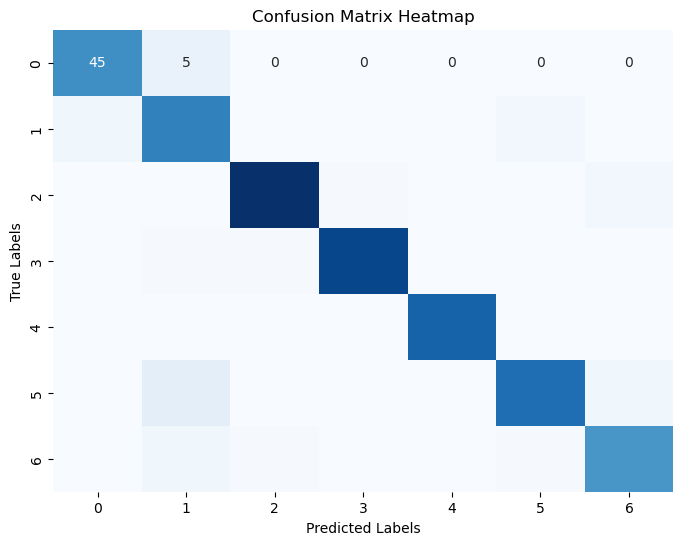

In [85]:
# Create a heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [87]:
# import accuracy library
from sklearn.metrics import classification_report

# check for the accuracy of the model
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00       274
           3       1.00      1.00      1.00       230
           4       1.00      1.00      1.00       267
           5       1.00      1.00      1.00       211
           6       1.00      1.00      1.00       242

    accuracy                           1.00      1655
   macro avg       1.00      1.00      1.00      1655
weighted avg       1.00      1.00      1.00      1655



In [89]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.75      0.91      0.82        54
           2       0.97      0.96      0.97        74
           3       0.98      0.97      0.98        67
           4       1.00      1.00      1.00        57
           5       0.95      0.84      0.89        64
           6       0.90      0.90      0.90        48

    accuracy                           0.93       414
   macro avg       0.93      0.93      0.92       414
weighted avg       0.93      0.93      0.93       414



- According to the test data classification report, the Random Forest model's accuracy on the test set was 93%. The capacity of the model to generalize to new data is demonstrated by this. The results of the training set indicate a slightly higher accuracy of 100%, indicating that the model is well-tuned but might be slightly prone to over fitting. Cross-validation or additional fine-tuning may help enhance the performance balance between testing and training.
- Accuracy: 93% of the samples in the test dataset were accurately predicted by the model, which yielded an overall accuracy of 93%.
- F1-score, precision, and recall are all roughly 0.93, showing steady performance across all classes when given equal treatment.
- Weighted Average: Taking into consideration the dataset's class distribution, the weighted average precision, recall, and F1-score are all 0.93.


In [107]:
# lets explore logistic regression
from sklearn.linear_model import LogisticRegression
Lreg=LogisticRegression()
Lreg.fit(x_train,y_train)

LogisticRegression()

In [113]:
y_pred_train= Lreg.predict(x_train)
y_pred_test = Lreg.predict(x_test)

In [115]:
y_pred_train

array([4, 0, 0, ..., 4, 3, 3])

In [117]:
y_pred_test

array([3, 6, 2, 4, 5, 6, 3, 4, 5, 0, 5, 0, 2, 2, 3, 3, 1, 0, 5, 0, 0, 2,
       0, 5, 6, 1, 5, 6, 6, 0, 6, 5, 5, 0, 2, 3, 0, 2, 2, 4, 5, 4, 1, 6,
       3, 1, 5, 0, 5, 6, 0, 3, 2, 4, 6, 5, 0, 2, 3, 5, 0, 3, 4, 1, 6, 2,
       0, 0, 6, 3, 0, 4, 1, 2, 1, 2, 5, 2, 3, 4, 6, 3, 0, 2, 5, 5, 3, 0,
       3, 4, 4, 1, 0, 4, 3, 3, 4, 1, 4, 5, 4, 3, 5, 3, 3, 2, 4, 3, 6, 6,
       2, 0, 6, 4, 1, 6, 2, 3, 4, 3, 1, 4, 0, 1, 6, 5, 0, 1, 2, 4, 2, 3,
       0, 2, 1, 1, 2, 5, 0, 5, 2, 2, 3, 4, 4, 5, 0, 1, 2, 2, 5, 1, 2, 4,
       3, 5, 3, 1, 1, 5, 3, 4, 3, 0, 5, 6, 2, 2, 2, 0, 3, 0, 5, 2, 4, 4,
       5, 0, 2, 0, 3, 5, 4, 3, 0, 5, 4, 2, 2, 5, 1, 2, 1, 4, 2, 6, 0, 4,
       2, 2, 6, 4, 6, 2, 0, 1, 5, 3, 4, 4, 2, 0, 4, 3, 1, 5, 4, 4, 2, 6,
       5, 6, 0, 6, 5, 5, 2, 2, 1, 4, 5, 0, 3, 0, 5, 2, 3, 0, 4, 2, 4, 2,
       3, 3, 2, 4, 1, 5, 1, 5, 2, 4, 5, 5, 0, 3, 3, 0, 3, 3, 6, 3, 6, 0,
       5, 6, 6, 4, 6, 5, 4, 4, 0, 5, 3, 6, 5, 1, 6, 0, 6, 4, 5, 5, 3, 3,
       4, 6, 3, 2, 0, 4, 3, 4, 6, 4, 3, 4, 1, 0, 3,

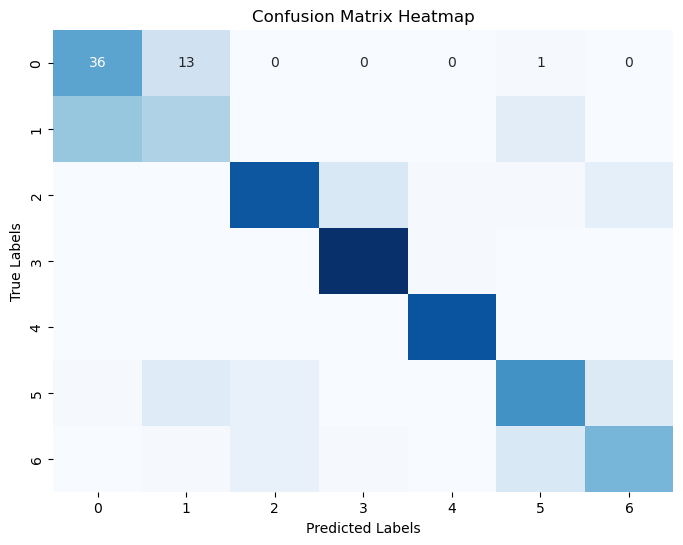

In [123]:
cm = confusion_matrix(y_test, y_pred_test)
# Create a heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [119]:
# check for the accuracy of the model y_train
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       210
           1       0.66      0.52      0.58       221
           2       0.80      0.76      0.78       274
           3       0.83      1.00      0.90       230
           4       0.97      0.99      0.98       267
           5       0.71      0.68      0.69       211
           6       0.69      0.66      0.68       242

    accuracy                           0.78      1655
   macro avg       0.77      0.78      0.77      1655
weighted avg       0.78      0.78      0.78      1655



In [121]:
# check for the accuracy of the model y_test
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64        50
           1       0.49      0.39      0.43        54
           2       0.85      0.76      0.80        74
           3       0.86      0.99      0.92        67
           4       0.97      1.00      0.98        57
           5       0.68      0.64      0.66        64
           6       0.67      0.65      0.66        48

    accuracy                           0.74       414
   macro avg       0.73      0.73      0.73       414
weighted avg       0.74      0.74      0.74       414



- The model obtained a 74% test accuracy and a 78% training accuracy, meaning that it correctly predicted the class labels for 78% of the training examples and 74% of the test samples.
-  Accuracy by itself does not give a whole view of the model's performance across classes, thus even while these results show a respectable level of predictive performance, there is still opportunity for improvement.- 
The model's performance across all classes is fairly evaluated because the macro-average F1-score, precision, and recall all lie within 0.77 and 0.78. All obesity categories are given identical weight by the macro-average, regardless of how frequently they appear in the dataset. These measurements show that the model can effectively manage the categorization task acrossnumerous categories, as evidenced by its consistently high average performance across all obesity groups. 



#### INTERPRETATION

- Addressing obesity in Peru, Mexico, and Colombia requires a multi-faceted approach that integrates education, policy, and community efforts.
- While cultural and regional differences influence dietary and physical activity patterns, the shared challenge of obesity underscores the need for collective action to promote healthier lifestyles. By prioritizing preventive measures and encouraging sustainable habits, these countries can work towards reducing obesity prevalence and improving public health outcomes.
